# **Projet** : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

**Notre objectif est classifier de façon efficace et efficiente des fruits et légumes.**
- Pour ce faire, on propose un première base de données, *simple-database*, dans laquelle chaque photo présente un unique fruit sur fond blanc. La reconnaissance est par conséquent grandement facilitée et les résultats attendus proches des 90-100% de précision.
- Pour complexifier les choses, on optera dans un second temps pour une base de données, *realistic-database*, avec certes moins de classes, mais dont les photos sont moins évidentes, plus réalistes.
- Nous déterminerons ensuite les potentiels bienfaits d'une base de données hybride entre la première et la seconde, *hybrid-database*.

Enfin, parce que c'est amusant, nous avons soumis les candidats à l'élection présidentielle de 2022 au détecteur de fruit... 

<b> Paramètres globaux du document </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [1]:
import sys
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path1 = "./Image-classification/databases/simple-database/"
#path2022 = "./Image-classification/databases/elections-maraichere-de-2022/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path1 = "./databases/simple-database/"
path2022 = "./databases/elections-maraichere-de-2022/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from Load import load_data
from Plots import plot_training_analysis, plot_random_images, plot_candidates, print_false_values
from Tests import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork # Conseillé
from VGG16Network import VGG16Network                           # Déconseillé : trop lent
from InceptionV3Network import InceptionV3Network               # Déconseillé : apprentissage inadéquat

# **Partie 1** : simple-database
<b> Paramètres de la base de données</b>

x_train.shape = (7050, 100, 100, 3)
y_train.shape = (7050, 1)

x_validation.shape = (1478, 100, 100, 3)
y_validation.shape = (1478, 1)

x_test.shape = (1488, 100, 100, 3)
y_test.shape = (1488, 1)



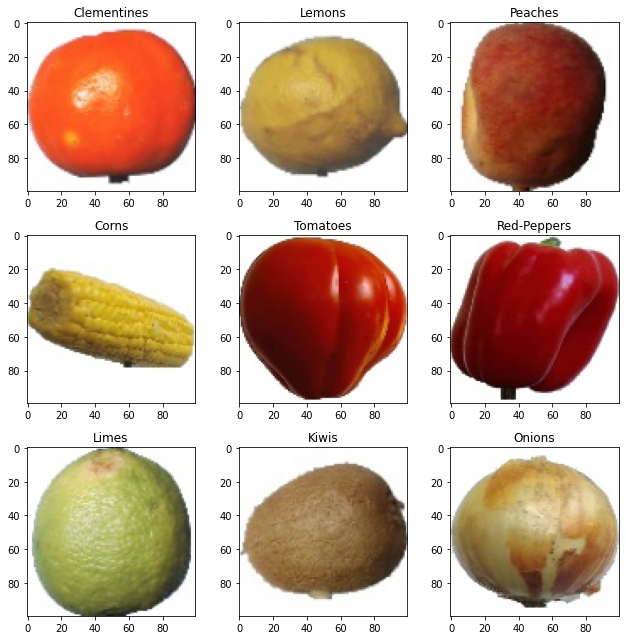

In [2]:
IMAGE_SIZE1 = 100
labels = ['Apples-Braeburn', 'Apples-Granny-Smith', 'Apricots',
          'Clementines','Corns', 'Cucumber-Ripes',
          'Green-Peppers', 'Kiwis', 'Lemons',
          'Limes', 'Mangos', 'Onions',
          'Oranges', 'Peaches', 'Pears',
          'Pineapples', 'Red-Peppers', 'Strawberries',
          'Tomatoes', 'Watermelons']

x_train, y_train = load_data(path1, labels, _imagesize=IMAGE_SIZE1)
x_val, y_val = load_data(path1, labels, _dataset='validation', _imagesize=IMAGE_SIZE1)
x_test, y_test = load_data(path1, labels, _dataset='test', _imagesize=IMAGE_SIZE1)

plot_random_images(x_train, y_train, labels)

<b>Lancement de l'entraînement</b>

In [3]:
METRICS = 'sparse_categorical_accuracy'

# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train)
val_generator = train_datagen.flow(x_val, y_val)

model1 = BasicConvolutionalNetwork(len(labels), IMAGE_SIZE1)

model1.build(input_shape=(None, IMAGE_SIZE1, IMAGE_SIZE1, 3))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=[METRICS])

history = model1.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_2 (Conv2D)           multiple                  54238     
                                                                 
 conv2d_3 (Conv2D)           multiple                  108416    
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten (Flatten)           multiple                  0         
                                       

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- <b>Evalutation du modèle</b> dans sa globalité.
- *(Affichage éventuel des prédictions râtées.)*

PREDICTIONS sur la donnée n°511/1487
     Apples-Braeburn -> 0.00%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.03%
     Green-Peppers -> 0.00%
     Kiwis -> 99.36%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.02%
     Oranges -> 0.00%
     Peaches -> 0.05%
     Pears -> 0.00%
     Pineapples -> 0.55%
     Red-Peppers -> 0.00%
     Strawberries -> 0.01%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Kiwis / 99.36%
ATTENDU  : Kiwis


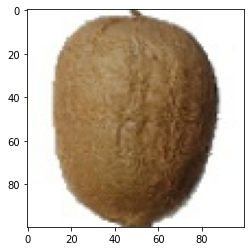

In [4]:
test_data(model1, labels, x_test, y_test)

EVALUATION DU MODELE basic_convolutional_network
149/149 [==============================] - 2s 14ms/step - loss: 2.1456 - sparse_categorical_accuracy: 0.9140
LOSS     : 2.15
ACCURACY : 91.40%


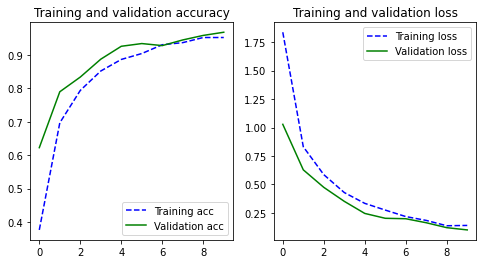

In [5]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, METRICS)

In [6]:
#print_false_values(model1, labels, x_test, y_test)

# **Partie 2** : realistic-database

# **Partie 3** : hybrid-database

# **Annexe** : Quels fruits sont-ils ?

*Les candidats à l'élection maraîchère de 2022 se prêtent à l'exercice...*

x_test.shape = (12, 100, 100, 3)
y_test.shape = (12, 1)



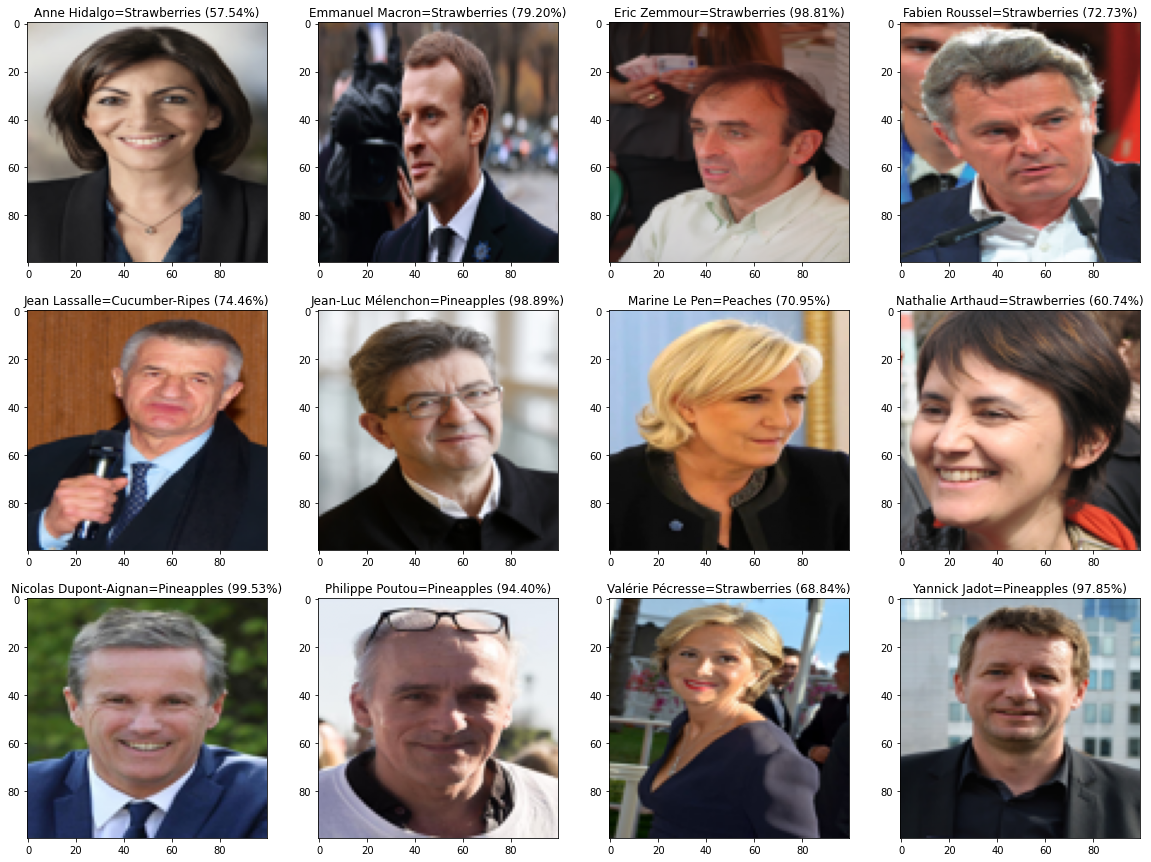

In [7]:
x_test, _ = load_data(path2022, labels, _dataset="test", _imagesize=IMAGE_SIZE1)
plot_candidates(model1, labels, x_test)